In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 準備資料集
https://www.kaggle.com/andrewmvd/face-mask-detection

# 將資料轉換為yolov5的資料格式

In [2]:
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data")
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data/images")
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels")
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/train")
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/val")
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels/train")
os.mkdir("/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels/val")

In [4]:
import shutil
path = "/content/gdrive/MyDrive/computer vision/face_mask/images"
for images in os.listdir(path):
    image_path = os.path.join(path,images)
    shutil.copy(image_path,"/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/train/"+images)

In [5]:
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse



path = "/content/gdrive/MyDrive/computer vision/face_mask/annotations/"
classes = {"with_mask":0,"without_mask":1,"mask_weared_incorrect":2}

for annotations in os.listdir(path):
    
    
    dom = parse(os.path.join(path,annotations))
    root = dom.documentElement
    filename = ".txt".join(root.getElementsByTagName("filename")[0].childNodes[0].data.split(".png"))
    
    image_width = root.getElementsByTagName("width")[0].childNodes[0].data
    image_height = root.getElementsByTagName("height")[0].childNodes[0].data
    with open("/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels/train/"+filename,"w") as r:
        
        for items in root.getElementsByTagName("object") :
            
            name = items.getElementsByTagName("name")[0].childNodes[0].data
            xmin = items.getElementsByTagName("xmin")[0].childNodes[0].data
            ymin = items.getElementsByTagName("ymin")[0].childNodes[0].data
            xmax = items.getElementsByTagName("xmax")[0].childNodes[0].data
            ymax = items.getElementsByTagName("ymax")[0].childNodes[0].data
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            
            r.write(str(classes[name]))
            r.write(" ")
            r.write(str(x_center_norm))
            r.write(" ")
            r.write(str(y_center_norm))
            r.write(" ")
            r.write(str(width_norm))
            r.write(" ")
            r.write(str(height_norm))
            r.write("\n")

In [3]:
from random import shuffle
from glob import glob
import random
import shutil

random.seed(42)
files = glob("/content/gdrive/MyDrive/computer vision/face_mask/images/*.png")
shuffle(files)
print(files[:5])
txt_train_path = "/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels/train/"
img_train_path = "/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/train/"
txt_val_path = "/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels/val/"
img_val_path = "/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/val/"
for i in files[:120]:
    
    filename = i.split("/")[-1]
    print(filename)
    shutil.move(txt_train_path+filename.replace(".png",".txt"),txt_val_path+filename.replace(".png",".txt"))
    shutil.move(img_train_path+filename,img_val_path+filename)

['/content/gdrive/MyDrive/computer vision/face_mask/images/maksssksksss509.png', '/content/gdrive/MyDrive/computer vision/face_mask/images/maksssksksss478.png', '/content/gdrive/MyDrive/computer vision/face_mask/images/maksssksksss454.png', '/content/gdrive/MyDrive/computer vision/face_mask/images/maksssksksss229.png', '/content/gdrive/MyDrive/computer vision/face_mask/images/maksssksksss677.png']
maksssksksss509.png
maksssksksss478.png
maksssksksss454.png
maksssksksss229.png
maksssksksss677.png
maksssksksss297.png
maksssksksss8.png
maksssksksss330.png
maksssksksss576.png
maksssksksss420.png
maksssksksss701.png
maksssksksss572.png
maksssksksss215.png
maksssksksss246.png
maksssksksss74.png
maksssksksss591.png
maksssksksss99.png
maksssksksss266.png
maksssksksss820.png
maksssksksss500.png
maksssksksss273.png
maksssksksss633.png
maksssksksss189.png
maksssksksss351.png
maksssksksss598.png
maksssksksss283.png
maksssksksss657.png
maksssksksss86.png
maksssksksss147.png
maksssksksss408.png
maks

In [4]:
with open("/content/gdrive/MyDrive/computer vision/face_mask/data.yaml","w") as f:
    f.write("train: ")
    f.write("/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/train/")
    f.write("\n")
    f.write("val: ")
    f.write("/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/val/")
    f.write("\n")
    f.write("nc: ")
    f.write(" 3")
    f.write("\n")
    f.write("names: ")
    f.write(" ['with_mask','without_mask','mask_weared_incorrect']")

In [5]:
with open("/content/gdrive/MyDrive/computer vision/face_mask/data.yaml","r") as f:
    print(f.read())

train: /content/gdrive/MyDrive/computer vision/face_mask/train_data/images/train/
val: /content/gdrive/MyDrive/computer vision/face_mask/train_data/images/val/
nc:  3
names:  ['with_mask','without_mask','mask_weared_incorrect']


In [7]:
!cat "/content/gdrive/MyDrive/computer vision/face_mask/train_data/labels/val/maksssksksss100.txt"

0 0.5425 0.2610619469026549 0.14 0.25663716814159293
0 0.98375 0.2853982300884956 0.0325 0.09292035398230089
0 0.35125 0.47123893805309736 0.1125 0.17256637168141592


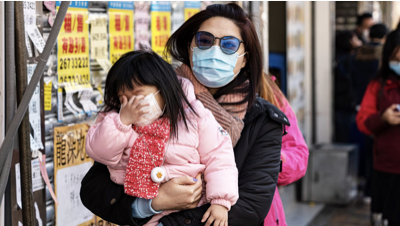

In [8]:
from PIL import Image
Image.open('/content/gdrive/MyDrive/computer vision/face_mask/train_data/images/val/maksssksksss100.png')

# 下載yolov5

In [9]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 7643, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 7643 (delta 225), reused 271 (delta 188), pack-reused 7280
Receiving objects: 100% (7643/7643), 9.06 MiB | 2.18 MiB/s, done.
Resolving deltas: 100% (5242/5242), done.


In [10]:
%cd yolov5

/content/yolov5


In [11]:
!pip install -r requirements.txt

     |████████████████████████████████| 645kB 12.8MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 訓練

In [12]:
!python train.py --img 640 --batch 32 --epochs 100 --data "/content/gdrive/MyDrive/computer vision/face_mask/data.yaml" --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=/content/gdrive/MyDrive/computer vision/face_mask/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=32, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-250-g02719dd torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

# 訓練結果

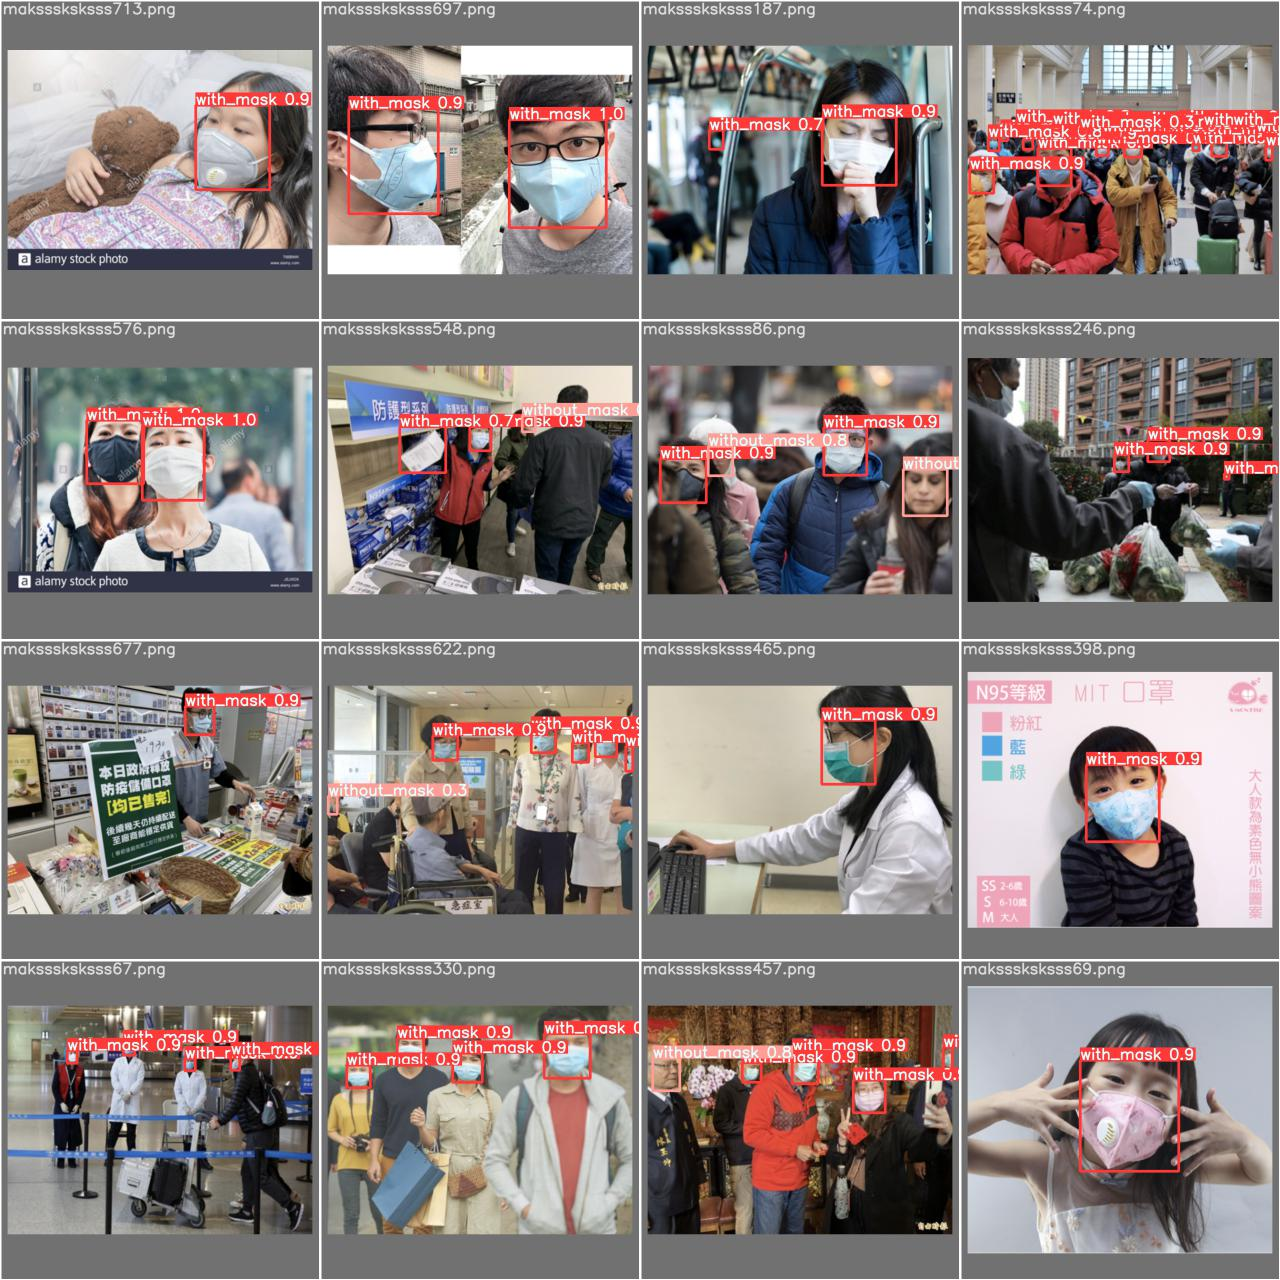

In [13]:
from IPython.display import Image
Image('/content/yolov5/runs/train/exp/test_batch1_pred.jpg')

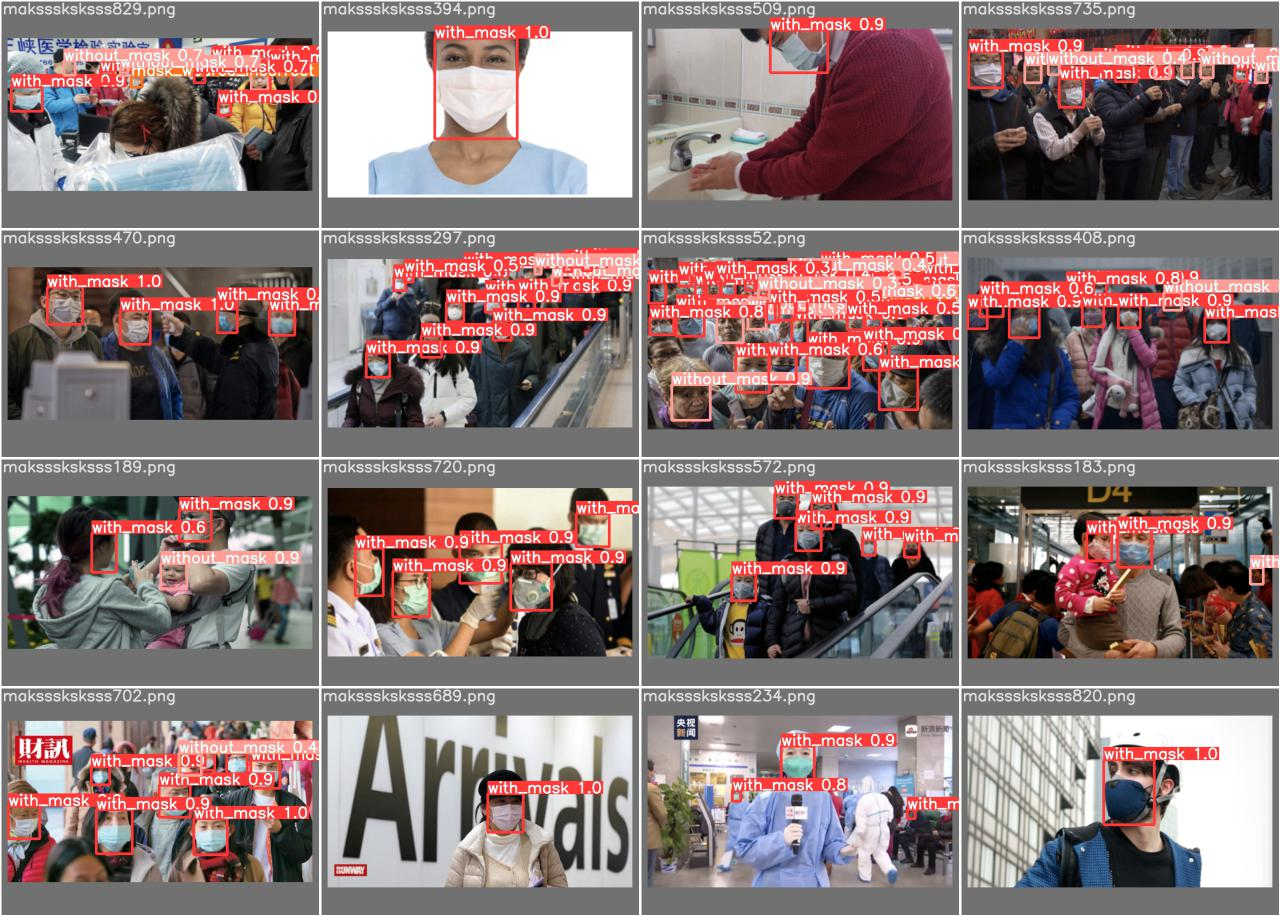

In [14]:
Image('/content/yolov5/runs/train/exp/test_batch0_pred.jpg')